In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform=transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)
batch_size=4
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True,num_workers=2)

testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=True,num_workers=2)


100%|████████████████████████████████████████████████████████████████████████| 170498071/170498071 [01:42<00:00, 1657141.50it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
classes=('plane','car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

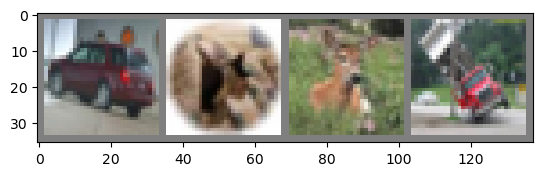

car   cat   deer  truck


In [16]:
dataiter=iter(trainloader)
images,labels=next(data)

imshow(torchvision.utils.make_grid(images))
print(" ".join(f'{classes[labels[i]]:5s}' for i in range(batch_size)))

In [18]:
import torch.nn as nn
import torch.nn.functional as f

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.f1=nn.Linear(16*5*5,120)
        self.f2=nn.Linear(120,84)
        self.f3=nn.Linear(84,10)
    
    def forward(self,x):
        x=self.pool(f.relu(self.conv1(x)))
        x=self.pool(f.relu(self.conv2(x)))
        x=torch.flatten(x,1)
        x=f.relu(self.f1(x))
        x=f.relu(self.f2(x))
        x=self.f3(x)
        return x

In [19]:
net=Net()

In [20]:
import torch.optim as optim
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [21]:
def train():
    for epoch in range(2):
        run_loss=0.0
        for i,data in enumerate(trainloader,0):
            inputs,labels=data
            optimizer.zero_grad()
            outputs=net(inputs)
            loss=criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            run_loss+=loss.item()
            
            if i%2000==1999:
                print(f'[{epoch+1},{i+1}] loss: {run_loss/2000}')
                run_loss=0.0
train()

[1,2000] loss: 2.2218865072727203
[1,4000] loss: 1.8778242004811765
[1,6000] loss: 1.6560560818314551
[1,8000] loss: 1.5807636422663927
[1,10000] loss: 1.5205475087165832
[1,12000] loss: 1.454939499616623
[2,2000] loss: 1.4095711865723133
[2,4000] loss: 1.3619400713145733
[2,6000] loss: 1.349267406836152
[2,8000] loss: 1.3116952436342835
[2,10000] loss: 1.2981362901106477
[2,12000] loss: 1.267364375203848


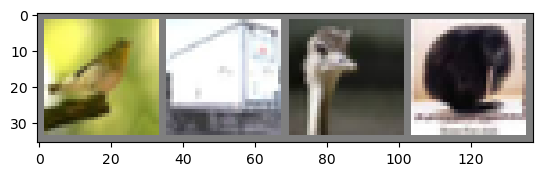

Predicted: bird truckbird bird 


In [24]:
testdata=iter(testloader)
images,labels=next(testdata)

imshow(torchvision.utils.make_grid(images))

print("Predicted:",''.join(f'{classes[labels[i]]:5s}' for i in range(4)))

In [26]:
correct_pred={i:0 for i in classes}
total_pred={i:0 for i in classes}

with torch.no_grad():
    for data in testdata:
        images,labels=data
        output=net(images)
        _,predictions=torch.max(output,1)
        for label,prediction in zip(labels,predictions):
            if label==prediction:
                correct_pred[classes[label]]+=1
            total_pred[classes[label]]+=1
            

In [28]:
for i,j in correct_pred.items():
    acc=(100*j)/total_pred[i]
    print(f'Accuracy:{i} is {acc:.1f}%')

Accuracy:plane is 58.9%
Accuracy:car is 50.4%
Accuracy:bird is 58.3%
Accuracy:cat is 26.2%
Accuracy:deer is 34.1%
Accuracy:dog is 63.0%
Accuracy:frog is 65.6%
Accuracy:horse is 62.9%
Accuracy:ship is 49.1%
Accuracy:truck is 47.7%
